# packages

In [ ]:
import logging
import pdb
from  sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
import scikitplot as skplt# $ pip install scikit-plot into base https://scikit-plot.readthedocs.io/en/stable/metrics.html
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# simplified ML workflow

![](ml_workflow.png)

# debugger test

In [ ]:
def test(a, b, n):
    x = []
    for i in range(0, n):
        x.append(a + b)
    return x

In [ ]:
a = 1
b = 2
n = 6
result = test(a, b, n)
result

[3, 3, 3, 3, 3, 3]

# preprocess data

In [ ]:
lines = open('../module_04-working_with_the_notebook/data/spambase.names').readlines()[33:]
colnames = [x.split(':')[0] for x in lines]
colnames.append('spam_class')
df = pd.read_csv('../module_04-working_with_the_notebook/data/spambase.data', header = None)
df.columns = colnames
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# target class distribution

In [ ]:
distr = df['spam_class'].value_counts()/len(df)
distr

spam_class
0    0.605955
1    0.394045
Name: count, dtype: float64

# spam_class by 2 vars

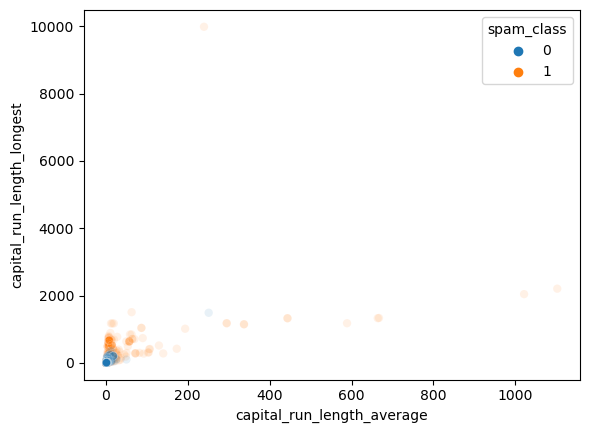

In [ ]:
#%matplotlib ipympl
# %matplotlib ipympl - interactive matplotlib plots - try hover over the plot

sns.scatterplot(x = 'capital_run_length_average', 
                y = 'capital_run_length_longest', 
                data = df, 
                hue = 'spam_class', 
                alpha = 0.1)
plt.show()

# spam_class distribution barchart

In [5]:
fig = px.bar(distr)
fig.show()

# train test split

In [ ]:
x = df[[col for col in df.columns if col != 'spam_class']]
y = df['spam_class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3082, 57), (1519, 57), (3082,), (1519,))

# logistic regression

In [ ]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
lr.score(x_train, y_train), lr.score(x_test, y_test) # accuracy

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



(0.9192083062946139, 0.9229756418696511)

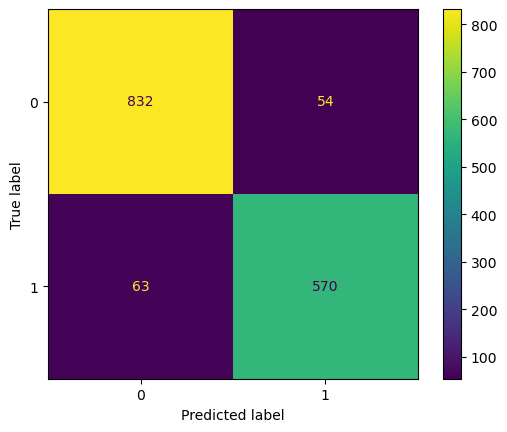

In [ ]:
predictions_lr = lr.predict(x_test)
cm_lr = confusion_matrix(y_test, predictions_lr, labels=lr.classes_)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr.classes_)
disp_lr.plot()

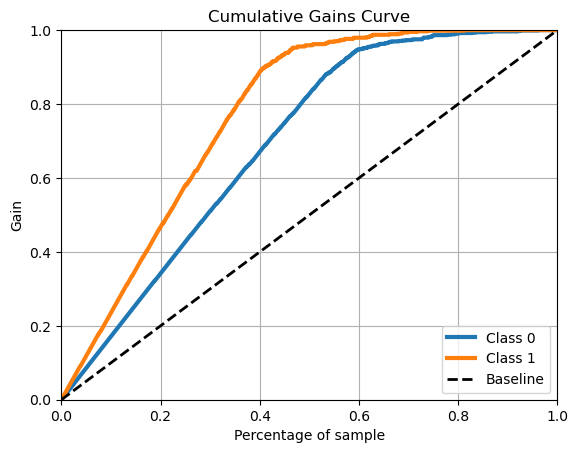

In [ ]:
predicted_probas_lr = lr.predict_proba(x_test)
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas_lr)
plt.show()

# random forest classifier

In [ ]:
rfc = RandomForestClassifier(max_depth=1, random_state=0, max_samples = 5)
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train), rfc.score(x_test, y_test) # accuracy

(0.7384815055158988, 0.7044107965766951)

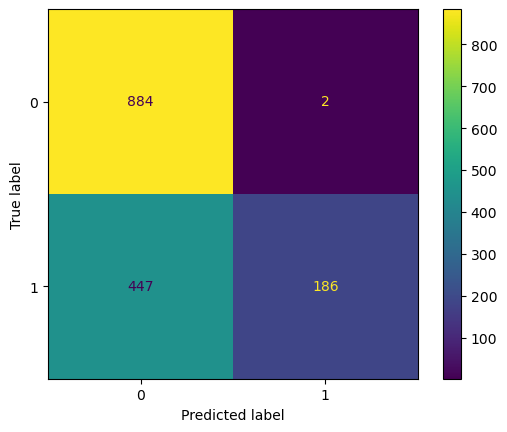

In [ ]:
predictions_rfc = rfc.predict(x_test)
cm_rfc = confusion_matrix(y_test, predictions_rfc, labels=rfc.classes_)
disp_rfc = ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=rfc.classes_)
disp_rfc.plot()

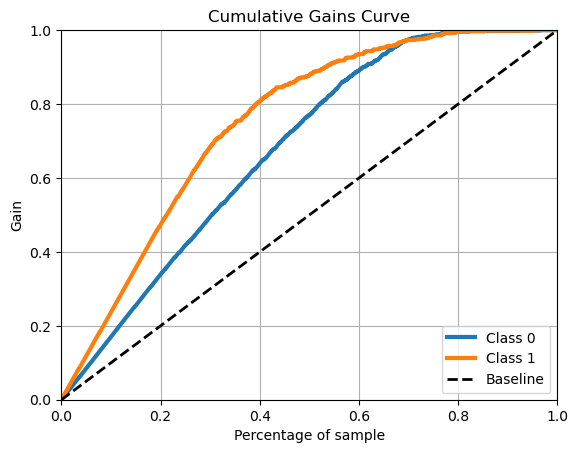

In [ ]:
predicted_probas_rfc = rfc.predict_proba(x_test)
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas_rfc)
plt.show()

# saving  scores to disk

In [6]:
df_scores = pd.DataFrame({'lr_predicted_values': predictions_lr,
                          'lr_predicted_probas': predicted_probas_lr[:,0],
                          'rfc_predicted_values': predictions_rfc,
                          'rfc_predicted_probas': predicted_probas_rfc[:,0]})
df_scores.to_csv('scores.csv', index = False, header = True)

# references

1. [Link extension](https://link.makinarocks.ai/)
2. [scikit-plot](https://scikit-plot.readthedocs.io/en/stable/metrics.html)
3. [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
4. [Random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
